In [1]:
 # Présentation contexte (Nb pokémons, caractéristique, problèmatique)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Données//pokemon-data.csv', delimiter=';')
mdf = pd.read_csv('Données//move-data.csv', delimiter=',')

In [4]:
df.sample()



,Name,Types,Abilities,Tier,HP,Attack,Defense,Special Attack,Special Defense,Speed,Next Evolution(s),Moves
389,Klink,['Steel'],"['Clear Body', 'Minus', 'Plus']",LC,40,55,70,45,60,30,['Klang'],"['Vice Grip', 'Charge', 'Thunder Shock', 'Gear..."


In [5]:
mdf.sample()

,Index,Name,Type,Category,Contest,PP,Power,Accuracy,Generation
665,666,Floral Healing,Fairy,Status,???,10,None,None,7


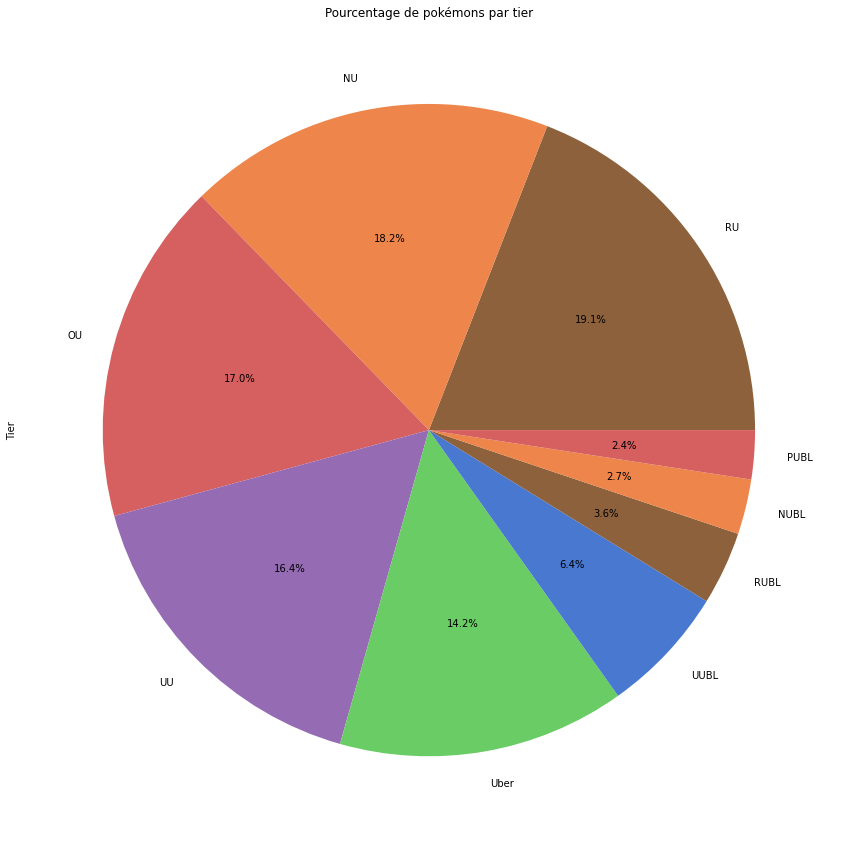

In [10]:
c = sns.color_palette('muted')
c = [c[5], c[1], c[3], c[4], c[2], c[0]]
df_tier = df[(df["Tier"] != "LC") & (df["Tier"] != "PU") & (df["Tier"] != "Limbo") & (df["Tier"] != "AG")]

fig, ax = plt.subplots(figsize=(15, 15))
ax = df_tier["Tier"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=c, title='Pourcentage de pokémons par tier')